In [ ]:
import pandas as pd
import numpy as np
import random
from collections import Counter
from matplotlib import pyplot as plt


#Read dataset function

In [ ]:
def read_data(data_path, target_label):
  data = pd.read_csv(data_path) #Read Dataset
  index = data.columns.get_loc(target_label) #find the number of target column 
  Y = data.iloc[:,index] 
  X = data.drop([target_label], axis=1)
  return X,Y


#Shuffle datas in dataset function

In [ ]:
def shuffle_data(X,Y):
  idx = np.random.permutation(X.index)
  shuffle_x = X.reindex(idx)
  shuffle_y = Y.reindex(idx)
  return shuffle_x, shuffle_y

#Split dataset to train_set and test_set function

In [ ]:
def split_data(X,Y,ratio_test):
  length_x = len(X)
  len_train = int(length_x *(1- ratio_test))
  x_train = X.loc[:len_train]
  y_train = Y.loc[:len_train]
  x_test = X.loc[len_train:]
  y_test = Y.loc[len_train:] 

  x_train = np.asarray(x_train)
  y_train = np.asarray(y_train)
  x_test = np.asarray(x_test)
  y_test = np.asarray(y_test)
  
  return  x_train, y_train, x_test, y_test


#Accuracy calculate function

In [ ]:
def accuracy_model(y,yhat):
  accuracy_model = sum(y == yhat)/len(y)
  return round(100*accuracy_model,3)

#Confusion matrix function

In [ ]:
def confusion_matrix(y,yhat):
  TP, TN, FP, FN = 0, 0, 0, 0
  for i in range(len(y)):
    try:
      if y.loc(i) == 1:
        if yhat.loc(i) == 1:
          TP += 1
        else:
          FP += 1
      else:
        if yhat.loc(i) == 1:
          FN += 1
        else:
          TN += 1
    except:
      if y[i] == 1:
        if yhat[i] == 1:
          TP += 1
        else:
          FP += 1
      else:
        if yhat[i] == 1:
          FN += 1
        else:
          TN += 1

  return TP, TN, FP, FN



#Report Classification function

In [ ]:
def report_classification(y, yhat):
  TP, TN, FP, FN = confusion_matrix(y, yhat)
  precision = TP / (TP + FP)
  recall = TP / (TP + FN)
  accuracy = (TP + TN) / (TP + FP + TN + FN)
  F1_Measure = (2 * precision * recall) / (precision + recall)
  specificity = TN / (TN + FP)
  return precision, recall, accuracy, F1_Measure, specificity

#KNN Class

In [ ]:
class KNN:
    def __init__(self,k):
        self.k = k
        self.x_train = []
        self.y_train = []

    def fit(self,x_train,y_train):
        self.x_train = x_train
        self.y_train = y_train

    def distance_ecu(self, x_train , x_test_point):
        distances = []
        for row in range(len(x_train)): ## Loop over the rows of X_train
            current_train_point = x_train[row] # Get them point by point
            current_distance = 0 ## Initialize the distance by zero        
            for col in range(len(current_train_point)): ## Loop over the columns of the row            
                current_distance += (current_train_point[col] - x_test_point[col])**2             
            current_distance = np.sqrt(current_distance)        
            distances.append(current_distance) ## Append the distances !    
        # Store distances in a dataframe
        distances = pd.DataFrame(data=distances, columns=['dist'])
        return distances

    def nearest_neighbors(self, distance_point , K):    
        df_nearest = distance_point.sort_values(by=['dist'], axis=0) # Sort distances using the sort_values function
        df_nearest = df_nearest[:K] ## Take only the first K neighbors
        return df_nearest  
    
    def voting(self , df_nearest , y_train):

      ## Use the Counter Object to get the labels with K nearest neighbors
      counter_vote  = Counter(y_train[df_nearest.index])
      # print("pp  ",counter_vote)
      
      y_pred = counter_vote.most_common()[0][0] ## Majority Voting !
      
      return y_pred 

    def KNN_predict(self, x_test ,  K):
      y_pred = []
      
      ## Loop over all the test set and perform the three steps
      for x_test_point in x_test:
          distance_point   = self.distance_ecu(self.x_train, x_test_point) ## Step 1
          df_nearest_point = self.nearest_neighbors(distance_point , K) ## step 2
          y_pred_point     = self.voting(df_nearest_point , self.y_train) ## Step 3 
          y_pred.append(y_pred_point)
      
      return y_pred 


#Read, Shuffle, Split health dataset

In [ ]:
url = 'https://drive.google.com/u/0/uc?id=1bdJ9ynDZEOjRvCWFbKm_3ADeHIjMEW_L&export=download'
x , y = read_data(url, 'target')
x_shuffle , y_shuffle = shuffle_data(x,y) 
for i in range(1,5): # For get better shuffling and imporve accuracy
  x_shuffle , y_shuffle = shuffle_data(x_shuffle,y_shuffle) 
x_train, y_train, x_test, y_test = split_data(x_shuffle , y_shuffle ,ratio_test=0.2)


#Train and test model for k = 1 to k = 15 by trian_set

In [ ]:
accuracy_list_train = []
n = 15 #number_neighbor
max_accuracy = 0
best_number_neighbor = 0
for i in range(1,n+1): 
  knn = KNN(i)
  knn.fit(x_train,y_train)
  y_pred = knn.KNN_predict(x_train ,i)
  accuracy = accuracy_model(y_pred,y_train)
  if accuracy >= max_accuracy and accuracy < 100: #for save best model
    max_accuracy = accuracy
    best_number_neighbor = i
  accuracy_list_train.append(accuracy)
  print('Knn(',i,')','acc=',accuracy)
knn_best = KNN(best_number_neighbor)
print('best number of neighbor=',best_number_neighbor,'with accuracy=', max_accuracy )  

Knn( 1 ) acc= 100.0
Knn( 2 ) acc= 100.0
Knn( 3 ) acc= 81.818
Knn( 4 ) acc= 87.013
Knn( 5 ) acc= 74.026
Knn( 6 ) acc= 81.818
Knn( 7 ) acc= 70.13
Knn( 8 ) acc= 76.623
Knn( 9 ) acc= 67.532
Knn( 10 ) acc= 76.623
Knn( 11 ) acc= 71.429
Knn( 12 ) acc= 74.026
Knn( 13 ) acc= 62.338
Knn( 14 ) acc= 67.532
Knn( 15 ) acc= 58.442
best number of neighbor= 4 with accuracy= 87.013


طبیعی است که در دیتای آموزش در مدل هایی با تعداد همسایگی های کم دقت 100 داشته باشیم به همین دلیل در شرط پیدا کردن دقت ماکسیمم کمتر از 100 هم قرار داده ام.

##Report Accuracy by plot

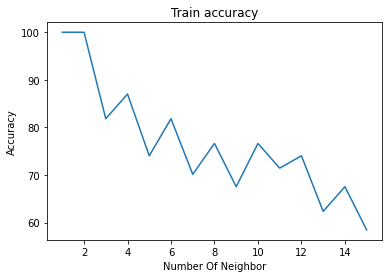

In [ ]:
plt.plot(list(range(1,n+1)),accuracy_list_train)
plt.title("Train accuracy")
plt.xlabel("Number Of Neighbor")
plt.ylabel("Accuracy")
plt.show()

#Train and test model for k = 1 to k = 15 by test_set

In [ ]:
accuracy_list_test = []
n = 15 #number_neighbor
max_accuracy = 0
best_number_neighbor = 0
for i in range(1,n+1): 
  knn = KNN(i)
  knn.fit(x_train,y_train)
  y_pred = knn.KNN_predict(x_test ,i)
  accuracy = accuracy_model(y_pred,y_test)
  if accuracy >= max_accuracy: #for save best model
    max_accuracy = accuracy
    best_number_neighbor = i
  accuracy_list_test.append(accuracy)
  print('Knn(',i,')','acc=',accuracy)
knn_best_test = KNN(best_number_neighbor)
print('best number of neighbor=',best_number_neighbor,'with accuracy=', max_accuracy )  

Knn( 1 ) acc= 60.352
Knn( 2 ) acc= 60.352
Knn( 3 ) acc= 59.031
Knn( 4 ) acc= 60.793
Knn( 5 ) acc= 59.471
Knn( 6 ) acc= 61.674
Knn( 7 ) acc= 62.555
Knn( 8 ) acc= 61.674
Knn( 9 ) acc= 61.674
Knn( 10 ) acc= 64.317
Knn( 11 ) acc= 62.115
Knn( 12 ) acc= 61.674
Knn( 13 ) acc= 59.912
Knn( 14 ) acc= 61.233
Knn( 15 ) acc= 59.471
best number of neighbor= 10 with accuracy= 64.317


##Report Accuracy by plot

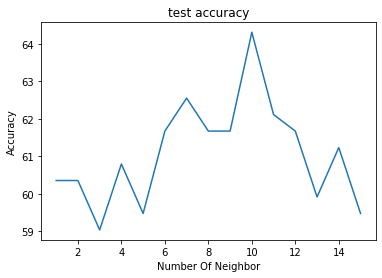

In [ ]:
plt.plot(list(range(1,n+1)),accuracy_list_test)
plt.title("test accuracy")
plt.xlabel("Number Of Neighbor")
plt.ylabel("Accuracy")
plt.show()

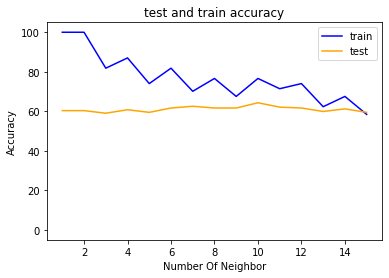

In [ ]:
plt.plot(list(range(1,n+1)),accuracy_list_train,color = 'blue' ,label = "train")
plt.plot(list(range(1,n+1)),accuracy_list_test,color = 'orange' ,label = "test")
plt.plot(list(range(1,2)),[0])
plt.legend()
plt.title("test and train accuracy")
plt.xlabel("Number Of Neighbor")
plt.ylabel("Accuracy")
plt.show()

#Report classification of test for best model

In [ ]:
knn_best_test.fit(x_train,y_train)
predict_best_model = knn_best_test.KNN_predict(x_test, best_number_neighbor)
# print(predict_best_model.shape , x_test.shape)
precision, recall, accuracy, F1_Measure, specificity = report_classification(predict_best_model,y_test)
print('precision =', precision, 'recall=',recall, 'accuracy=',accuracy, 'F1_Measure=',F1_Measure, 'specificity=',specificity)

precision = 0.6158940397350994 recall= 0.8017241379310345 accuracy= 0.6431718061674009 F1_Measure= 0.6966292134831461 specificity= 0.4774774774774775
